In [0]:
display(dbutils.fs.mounts())


mountPoint,source,encryptionType
/databricks-datasets,databricks-datasets,
/Volumes,UnityCatalogVolumes,
/databricks/mlflow-tracking,databricks/mlflow-tracking,
/databricks-results,databricks-results,
/mnt/raw,wasbs://raw-data@rivalaisstorage.blob.core.windows.net/,
/databricks/mlflow-registry,databricks/mlflow-registry,
/Volume,DbfsReserved,
/volumes,DbfsReserved,
/,DatabricksRoot,
/volume,DbfsReserved,


In [0]:
display(dbutils.fs.ls("/mnt/raw"))


path,name,size,modificationTime
dbfs:/mnt/raw/AI Data Developer Technical Challenge - Sample Raw Data.csv,AI Data Developer Technical Challenge - Sample Raw Data.csv,14533,1739621297000


In [0]:
from pyspark.sql import SparkSession

# Load raw CSV data
raw_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/mnt/raw/AI Data Developer Technical Challenge - Sample Raw Data.csv")

# Store in Bronze layer
raw_df.write.format("delta").mode("overwrite").save("dbfs:/mnt/bronze/raw_text_data")

display(raw_df)


id,category,text
1,customer_review,"I recently filed a claim with Rival Insurance, and the process was slower than expected. The customer service was helpful, but I had to follow up multiple times."
2,customer_review,Amazing experience! Rival Insurance approved my claim in just two days. Very satisfied with the service.
3,customer_review,Frustrating experience. My claim was denied without a clear explanation. I will consider switching providers.
4,policy_document,"Policyholder agrees to maintain comprehensive coverage for damages not caused by collision, including theft and natural disasters."
5,policy_document,"This insurance policy covers personal injury protection (PIP) up to $50,000 per insured person per accident."
6,policy_document,"Exclusions: This policy does not cover damages resulting from intentional acts, fraud, or unauthorized vehicle usage."
7,claim_note,Claim #11234: Reviewed documents and found discrepancies in reported damages. Requested additional evidence from claimant.
8,claim_note,Claim #23567: Approved for payout after verification of supporting documents and repair estimates.
9,claim_note,Claim #34890: Denied due to policy exclusion on pre-existing damages. Notified policyholder of appeal options.
10,customer_review,Had to wait on hold for over an hour before speaking to a representative. Not a great experience.


In [0]:
from pyspark.sql.functions import col, lower, regexp_replace

# Load data from Bronze layer
bronze_df = spark.read.format("delta").load("dbfs:/mnt/bronze/raw_text_data")

# Data cleaning & preprocessing
silver_df = bronze_df.withColumn("text", lower(col("text")))  # Convert text to lowercase
silver_df = silver_df.withColumn("text", regexp_replace(col("text"), "[^a-zA-Z0-9\s]", ""))  # Remove special chars
silver_df = silver_df.dropDuplicates()  # Remove duplicates

# Store in Silver layer
silver_df.write.format("delta").mode("overwrite").save("dbfs:/mnt/silver/cleaned_text_data")

display(silver_df)


id,category,text
34,customer_review,great experience with rival insurance they handled my claim quickly and professionally
44,claim_note,claim 38945 initial payout approved funds to be disbursed soon
26,claim_note,claim 56789 payment approved issued to policyholder
77,customer_review,frustrating experience trying to contact customer support long wait times
88,customer_review,would appreciate clearer communication on claim status updates
96,policy_document,medical expense coverage includes up to 10000 per passenger
92,claim_note,claim 90345 final approval granted payment scheduled
90,policy_document,roadside assistance coverage includes towing up to 50 miles
81,customer_review,extremely satisfied with the fast processing of my claim thank you
55,claim_note,claim 67234 investigation pending adjuster scheduled for next week


In [0]:
from pyspark.sql.functions import length

# Load data from Silver layer
silver_df = spark.read.format("delta").load("dbfs:/mnt/silver/cleaned_text_data")

# Filter out very short texts (less than 50 characters)
gold_df = silver_df.filter(length(col("text")) > 50)

# Store in Gold layer
gold_df.write.format("delta").mode("overwrite").save("dbfs:/mnt/gold/processed_text_data")

display(gold_df)


id,category,text
34,customer_review,great experience with rival insurance they handled my claim quickly and professionally
44,claim_note,claim 38945 initial payout approved funds to be disbursed soon
26,claim_note,claim 56789 payment approved issued to policyholder
77,customer_review,frustrating experience trying to contact customer support long wait times
88,customer_review,would appreciate clearer communication on claim status updates
96,policy_document,medical expense coverage includes up to 10000 per passenger
92,claim_note,claim 90345 final approval granted payment scheduled
90,policy_document,roadside assistance coverage includes towing up to 50 miles
81,customer_review,extremely satisfied with the fast processing of my claim thank you
55,claim_note,claim 67234 investigation pending adjuster scheduled for next week


In [0]:
%pip install openai


  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/67/a0/e1fe4e87218639fc0a0927da5266c2978eaa0e2eb5437479ee64a11535bb/openai-1.63.0-py3-none-any.whl.metadata
  Obtaining dependency information for anyio<5,>=3.5.0 from https://files.pythonhosted.org/packages/46/eb/e7f063ad1fec6b3178a3cd82d1a3c4de82cccf283fc42746168188e1cdd5/anyio-4.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/2a/39/e50c7c3a983047577ee07d2a9e53faf5a69493943ec3f6a384bdc792deb2/httpx-0.28.1-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/packages/f8/9b/92f9da9a9e107d019bcf883cd9125fa1690079f323f5a9d5c6986eeec3c0/jiter-0.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for sniffio from https://files.pythonhosted.org/packages/e9/44/75a9c9421471a6c4805dbf2356f7c181a29c1879239ab

In [0]:
%pip install nest_asyncio aiohttp


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import openai
import asyncio
import aiohttp
import nest_asyncio
import pandas as pd

# Apply nest_asyncio to avoid event loop conflicts in Databricks
nest_asyncio.apply()

openai.api_type = "azure"
openai.api_base = "https://sknir-m765z46u-eastus2.cognitiveservices.azure.com/"  
openai.api_version = "2024-08-01-preview"
openai.api_key = "X"  


In [0]:
async def generate_summary_async(session, text, max_retries=5):
    """ Asynchronous function to send a request to Azure OpenAI with retry logic for rate limits. """
    retries = 0
    while retries < max_retries:
        try:
            async with session.post(
                url=f"{openai.api_base}openai/deployments/gpt-4-deployment/chat/completions?api-version={openai.api_version}",
                headers={
                    "Content-Type": "application/json",
                    "api-key": openai.api_key
                },
                json={
                    "messages": [
                        {"role": "system", "content": "You are an AI that summarizes insurance claim descriptions concisely."},
                        {"role": "user", "content": f"Summarize this insurance claim: {text}"}
                    ],
                    "max_tokens": 100
                }
            ) as response:
                result = await response.json()  # Convert response to JSON
                print("DEBUG: Full API Response:", result)  
                
                if "choices" in result:
                    return result["choices"][0]["message"]["content"]
                elif "error" in result:
                    if result["error"]["code"] == "429":
                        print(f"Rate limit exceeded. Retrying in 10 seconds... (Attempt {retries+1}/{max_retries})")
                        await asyncio.sleep(10)  # Wait before retrying
                        retries += 1
                    else:
                        return f"API Error: {result['error']['message']}"  # Return error message if present
                else:
                    return "Unexpected API Response Format"
        except Exception as e:
            return f"Error: {str(e)}"
    
    return "Failed after multiple retries due to rate limiting."


In [0]:
async def batch_summarize(text_list, batch_size=2):  
    """ Process API requests in batches for efficiency, handling rate limits. """
    summaries = []
    async with aiohttp.ClientSession() as session:
        for i in range(0, len(text_list), batch_size):
            batch = text_list[i:i + batch_size]  # Split into batches
            tasks = [generate_summary_async(session, text) for text in batch]
            results = await asyncio.gather(*tasks)  # Process all tasks in parallel
            summaries.extend(results)
    return summaries


In [0]:
# Load processed text data from Gold Layer
gold_df = spark.read.format("delta").load("dbfs:/mnt/gold/processed_text_data")

# Convert Spark DataFrame to Pandas
text_data = gold_df.select("text").toPandas()

# Run batch summarization with retry handling
loop = asyncio.get_running_loop()
future = asyncio.create_task(batch_summarize(text_data["text"].tolist(), batch_size=2))
summaries = loop.run_until_complete(future)

# Store the results back in the DataFrame
text_data["summary"] = summaries


DEBUG: Full API Response: {'choices': [{'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}, 'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': 'Initial payout for claim 38945 has been approved and funds will be disbursed soon.', 'role': 'assistant'}}], 'created': 1739647529, 'id': 'chatcmpl-B1I53ADUvDmWimqloVREevZSUeHxh', 'model': 'gpt-4-turbo-2024-04-09', 'object': 'chat.completion', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'system_fingerprint': 'fp_5603ee5e2e', 'usage': {'completion_token

In [0]:
# Convert back to Spark DataFrame
summary_df = spark.createDataFrame(text_data)

# Save summarized data to the Gold Layer
summary_df.write.format("delta").mode("overwrite").save("dbfs:/mnt/gold/summarized_text_data")

display(summary_df)


text,summary
great experience with rival insurance they handled my claim quickly and professionally,"Customer had a positive experience with rival insurance, describing their claim handling as quick and professional."
claim 38945 initial payout approved funds to be disbursed soon,Initial payout for claim 38945 has been approved and funds will be disbursed soon.
claim 56789 payment approved issued to policyholder,Claim 56789 has been approved and payment has been issued to the policyholder.
frustrating experience trying to contact customer support long wait times,The insurance claim involves a customer experiencing frustrating long wait times when trying to contact support.
would appreciate clearer communication on claim status updates,The insured is requesting more frequent and clearer updates on the status of their insurance claim.
medical expense coverage includes up to 10000 per passenger,"The insurance policy covers medical expenses up to $10,000 for each passenger."
claim 90345 final approval granted payment scheduled,Claim 90345 has received final approval and payment is scheduled.
roadside assistance coverage includes towing up to 50 miles,The insurance claim states that roadside assistance coverage provides towing services for up to 50 miles.
extremely satisfied with the fast processing of my claim thank you,⚠️ Failed after multiple retries due to rate limiting.
claim 67234 investigation pending adjuster scheduled for next week,Claim 67234 is currently under investigation with an adjuster scheduled for next week.


In [0]:
summary_df = spark.read.format("delta").load("dbfs:/mnt/gold/summarized_text_data")

# Convert to Pandas for text analysis
summary_pd = summary_df.toPandas()


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Convert summaries to a list
summaries = summary_pd["summary"].tolist()

# Create a CountVectorizer to find common words
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2), max_features=20)
X = vectorizer.fit_transform(summaries)

# Get the most common words/phrases
common_words = np.array(vectorizer.get_feature_names_out())
word_frequencies = X.toarray().sum(axis=0)

# Sort by frequency
sorted_indices = np.argsort(word_frequencies)[::-1]
top_policy_terms = common_words[sorted_indices]


print("🔹 Most Common Policy Coverages:")
print(top_policy_terms[:10])


🔹 Most Common Policy Coverages:
['claim' 'insurance' 'insurance claim' 'policy' 'coverage' 'customer'
 'approved' 'policyholder' 'insurance policy' 'service']


In [0]:
pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/bf/ce/0d0e61429f603bac433910d99ef1a02ce45a8967ffbe3cbee48599e62d88/regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/40.5 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 71.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/792.7 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 46.7 MB/s eta 0:00:00
Note: you may need to restart

In [0]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# sentiment analysis
summary_pd["sentiment_score"] = summary_pd["summary"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Categorize as positive, neutral, or negative
summary_pd["sentiment"] = summary_pd["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

sentiment_counts = summary_pd["sentiment"].value_counts()
print("🔹 Sentiment Distribution:")
print(sentiment_counts)


🔹 Sentiment Distribution:
Negative    44
Positive    34
Neutral     22
Name: sentiment, dtype: int64


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
# keywords related to claims processing
claim_stages = ["approved", "denied", "pending", "under review", "processed", "payment issued", "investigation", "rejected"]

# Count occurrence
stage_counts = {stage: summary_pd["summary"].str.contains(stage, case=False).sum() for stage in claim_stages}

# Sort 
sorted_stages = sorted(stage_counts.items(), key=lambda x: x[1], reverse=True)

print("🔹 Most Common Claim Process Stages:")
for stage, count in sorted_stages[:5]:
    print(f"{stage}: {count}")


🔹 Most Common Claim Process Stages:
approved: 10
denied: 7
pending: 5
under review: 3
investigation: 3


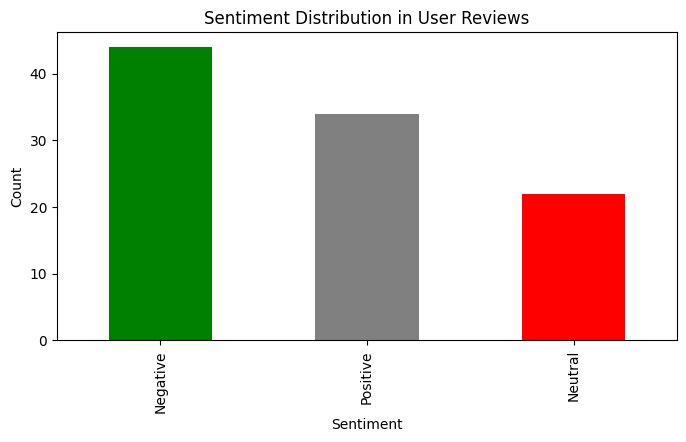

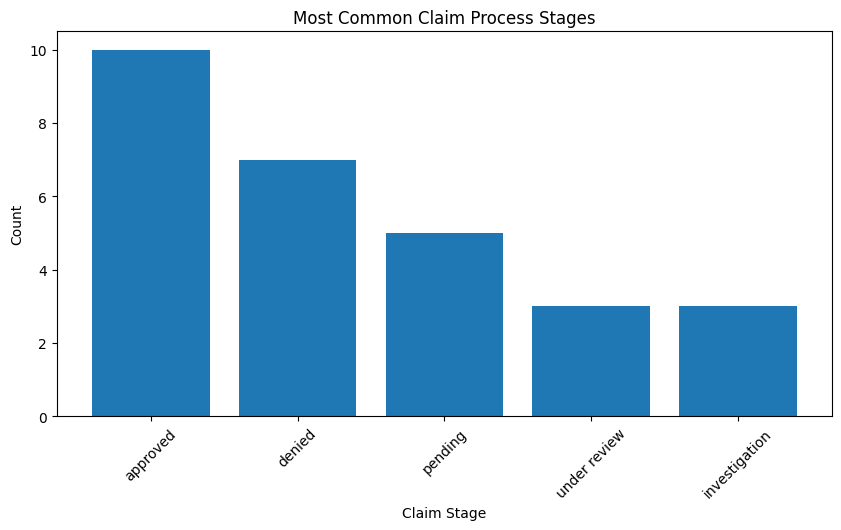

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution in User Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(*zip(*sorted_stages[:5]))  # Top 5 stages
plt.title("Most Common Claim Process Stages")
plt.xlabel("Claim Stage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [0]:
import requests
import json

AZURE_FUNCTION_URL = "https://rivlasummarizationfunc.azurewebsites.net/api/summarize"

def get_summary(text):
    """Call Azure Function API for summarization"""
    headers = {"Content-Type": "application/json"}
    data = json.dumps({"text": text})
    
    response = requests.post(AZURE_FUNCTION_URL, headers=headers, data=data)
    
    if response.status_code == 200:
        return response.json().get("summary", "No summary returned.")
    else:
        return f"Error: {response.status_code} - {response.text}"

# Test the API Call
sample_text = "Customer had an accident and filed a claim."
summary = get_summary(sample_text)
print("Generated Summary:", summary)

# this can be done for the whole data and then it can be converted to csv or other desired formats.

Generated Summary: A customer experienced an accident and subsequently filed an insurance claim.


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark
spark = SparkSession.builder.appName("SummarizedDataAPI").getOrCreate()

#  Function to fetch summarized data from Delta Table
def get_summarized_data():
    try:
        # Load summarized data from Gold Layer
        summary_df = spark.read.format("delta").load("dbfs:/mnt/gold/summarized_text_data")

        # Convert Spark DataFrame to JSON
        summaries = summary_df.toJSON().collect()

        return json.dumps({"status": "success", "data": summaries}, indent=4)
    
    except Exception as e:
        return json.dumps({"status": "error", "message": str(e)}, indent=4)


print(get_summarized_data())


{
    "status": "success",
    "data": [
        "{\"text\":\"great experience with rival insurance they handled my claim quickly and professionally\",\"summary\":\"Customer had a positive experience with rival insurance, describing their claim handling as quick and professional.\"}",
        "{\"text\":\"claim 38945 initial payout approved funds to be disbursed soon\",\"summary\":\"Initial payout for claim 38945 has been approved and funds will be disbursed soon.\"}",
        "{\"text\":\"claim 56789 payment approved issued to policyholder\",\"summary\":\"Claim 56789 has been approved and payment has been issued to the policyholder.\"}",
        "{\"text\":\"frustrating experience trying to contact customer support long wait times\",\"summary\":\"The insurance claim involves a customer experiencing frustrating long wait times when trying to contact support.\"}",
        "{\"text\":\"would appreciate clearer communication on claim status updates\",\"summary\":\"The insured is requestin